In [3]:
import numpy as np
import skimage as ski

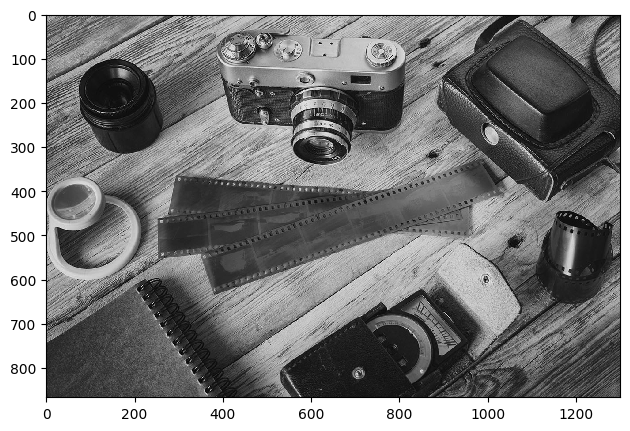

In [17]:
image = ski.io.imread(r"../Media/sample.jpg", as_gray=True)
ski.io.imshow(image)

# Filter

In [42]:
averageFilter = np.ones((5,5))/25
averageFilter

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [55]:
imageCopyPadding = image.copy()
imageCopyPadding = np.pad(image, 2, mode='constant')

In [56]:
newImage = np.zeros(imageCopyPadding.shape)
for i in range(1, image.shape[0]):
    for j in range(1, image.shape[1]):
        newImage[i][j] = np.sum(imageCopyPadding[i:i+5, j:j+5]*averageFilter)

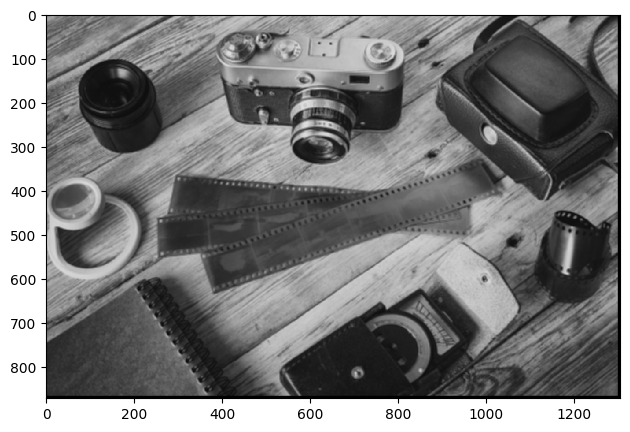

In [57]:
ski.io.imshow(newImage)

# median

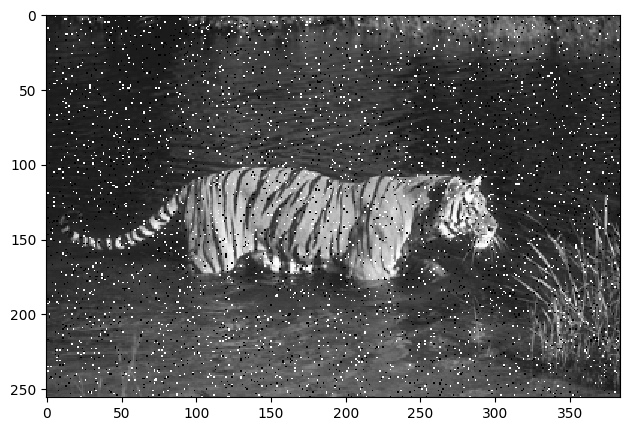

In [79]:
saltPepperImage = ski.io.imread(r"https://www.fit.vutbr.cz/~vasicek/imagedb/img_corrupted/impnoise_005/108073.png", as_gray=True)
ski.io.imshow(saltPepperImage)

In [73]:
saltPepperImageCopyPadding = saltPepperImage.copy()
saltPepperImageCopyPadding = np.pad(saltPepperImage, 2, mode='constant')

In [74]:
newSaltPepperImage = np.zeros(saltPepperImageCopyPadding.shape)

for i in range(saltPepperImage.shape[0]):
    for j in range(saltPepperImage.shape[1]):
        newSaltPepperImage[i][j] = np.median(saltPepperImageCopyPadding[i:i+3, j:j+3])
newSaltPepperImage = newSaltPepperImage[2:-2, 2:-2]

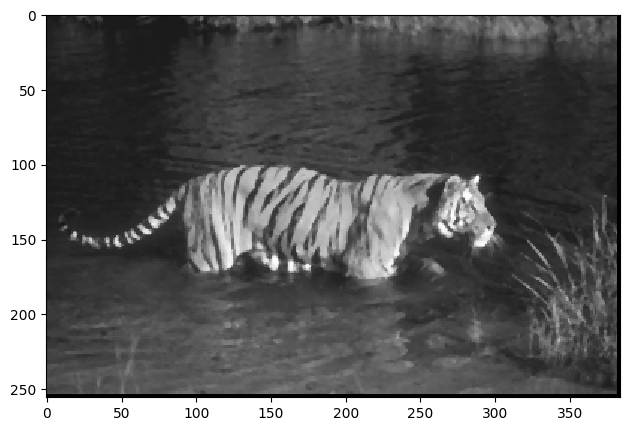

In [77]:
ski.io.imshow(newSaltPepperImage.astype(np.uint8))

# Function

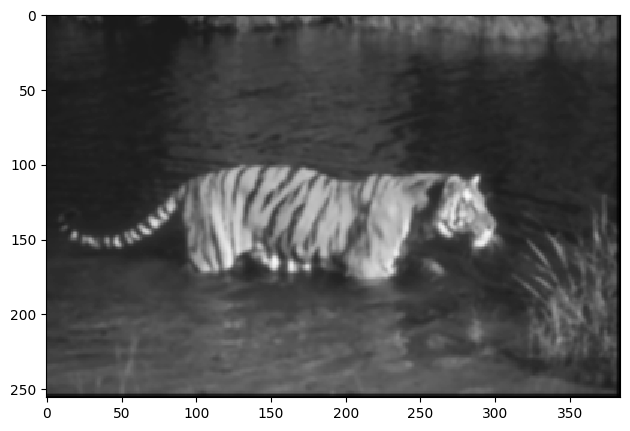

In [89]:
m = ski.filters.gaussian(image, sigma=1)
ski.io.imshow(m.astype(np.uint8))

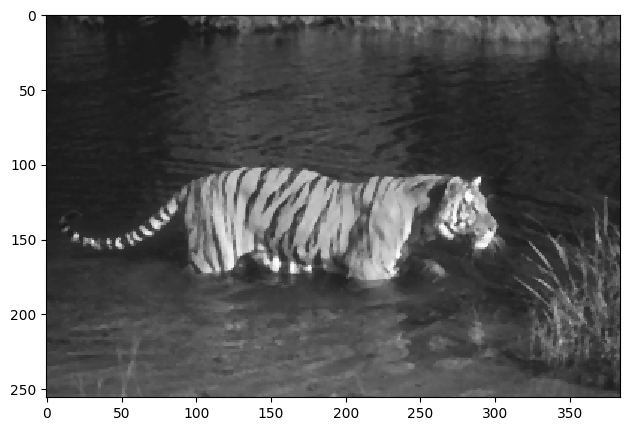

In [92]:
n = ski.filters.median(saltPepperImage)
ski.io.imshow(n.astype(np.uint8))

In [2]:
import numpy as np
from scipy.signal import correlate

matrix = np.array([1, 0, 1, 0, 1])
filter = np.array([3, 4, 5])

result = correlate(matrix, filter, mode='valid')
print(result)


[8 4 8]


In [3]:
matrix = np.array([[1, 0, 1, 0, 1],
                   [0, 0, 1, 0, 0],
                   [1, 0, 1, 0, 1],
                   [0, 1, 1, 1, 0]])

filter = np.array([[3, 4, 5],
                   [1, 0, 1],
                   [0, 4, 0]])

result = correlate(matrix, filter, mode='valid')
print(result)


[[ 9  8  9]
 [11  8  9]]


In [12]:
filter = np.array([[2, 5, 2],
           [3, 2, 1],
           [7, 7, 4]])

result = correlate(matrix, filter, mode='valid')
result = np.floor(result)
print(result)


[[ 30.  52.  53.  67.  50.]
 [ 85. 121. 110.  89.  46.]
 [ 44.  78.  99. 119.  75.]
 [ 53.  77.  82.  87.  77.]
 [ 16.  25.  42.  49.  36.]]


In [23]:
import numpy as np

matrix = np.array([[0, 0, 0, 0, 0, 0, 0],
                   [0, 5, 2, 4, 2, 1, 0],
                   [0, 2, 1, 2, 4, 2, 0],
                   [0, 5, 4, 5, 2, 1, 0],
                   [0, 2, 1, 4, 5, 2, 0],
                   [0, 1, 2, 1, 2, 5, 0],
                   [0, 0, 0, 0, 0, 0, 0]])

print(matrix)


[[0 0 0 0 0 0 0]
 [0 5 2 4 2 1 0]
 [0 2 1 2 4 2 0]
 [0 5 4 5 2 1 0]
 [0 2 1 4 5 2 0]
 [0 1 2 1 2 5 0]
 [0 0 0 0 0 0 0]]


In [24]:
from scipy.ndimage import median_filter

matrix_median = median_filter(matrix, size=3)
print(matrix_median)


[[0 0 0 0 0 0 0]
 [0 0 2 2 2 0 0]
 [0 2 4 2 2 1 0]
 [0 1 2 4 2 2 0]
 [0 1 2 2 2 2 0]
 [0 0 1 1 2 0 0]
 [0 0 0 0 0 0 0]]


In [25]:
from scipy.ndimage import laplace
import numpy as np

matrix = np.array([[50, 50, 50, 50, 50, 50],
                   [50, 50, 50, 50, 50, 50],
                   [50, 50, 50, 50, 50, 50],
                   [100, 100, 100, 100, 100, 100],
                   [100, 100, 100, 100, 100, 100],
                   [100, 100, 100, 100, 100, 100]])

laplacian_matrix = laplace(matrix)
print(laplacian_matrix)


[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [ 50  50  50  50  50  50]
 [-50 -50 -50 -50 -50 -50]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]
